In [1]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=757a48c708466dc18c2f243ec73cce048335f55613b9680144bfd34bb8ca6597
  Stored in directory: c:\users\danon\appdata\local\pip\cache\wheels\36\49\c9\2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn


Задание. Дан массив данных
𝑋 = 𝑛𝑝.𝑎𝑟𝑟𝑎𝑦([[5,3], [10,15],
[15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91], ])
Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.

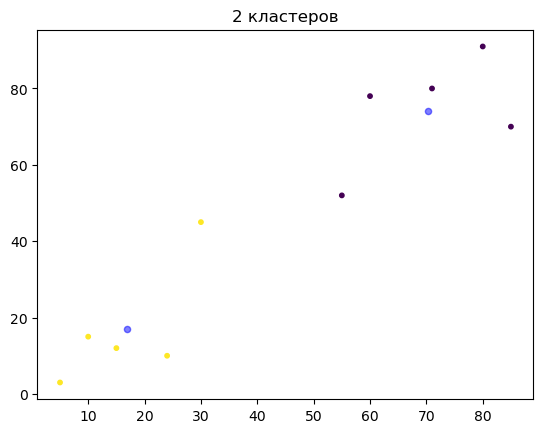

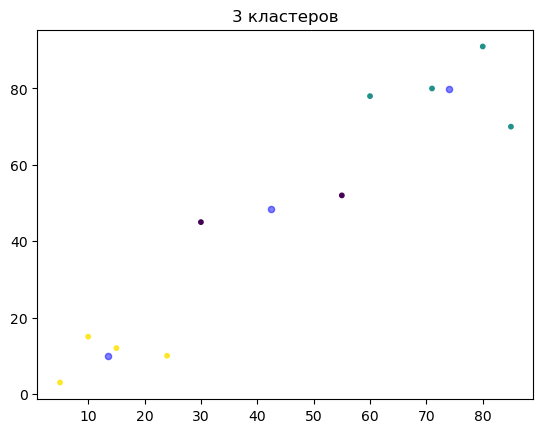

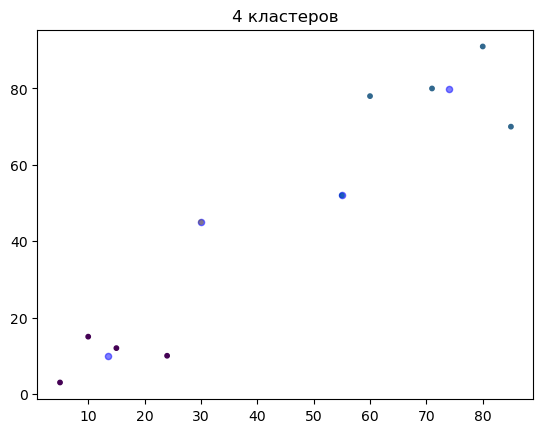

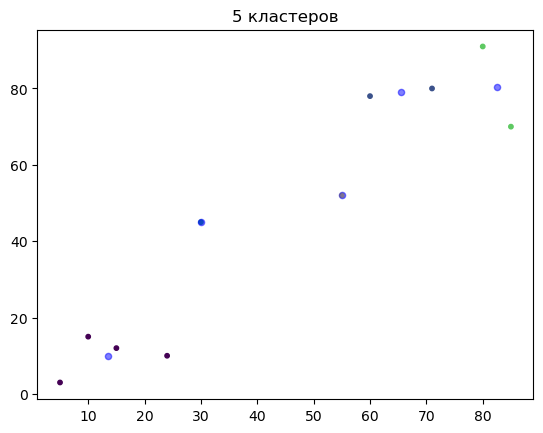

In [2]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
x = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52],[80,91]])
for i in range(2,6):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x)
  y_kmeans = kmeans.predict(x)
  X, y_true = make_blobs(n_samples = 10, centers = i, cluster_std = 1, random_state = 0)
  plt.scatter(x[:,0], x[:,1], c = y_kmeans, s =10)
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:,0], centers[:,1], c = 'blue', s =20, alpha = 0.5)
  plt.title(f"{i} кластеров")
  plt.show()
  


Задание. Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

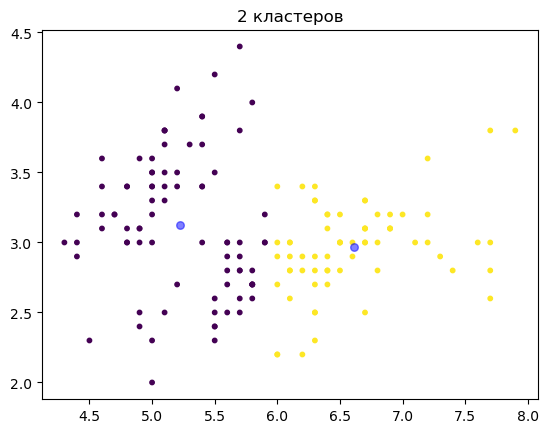

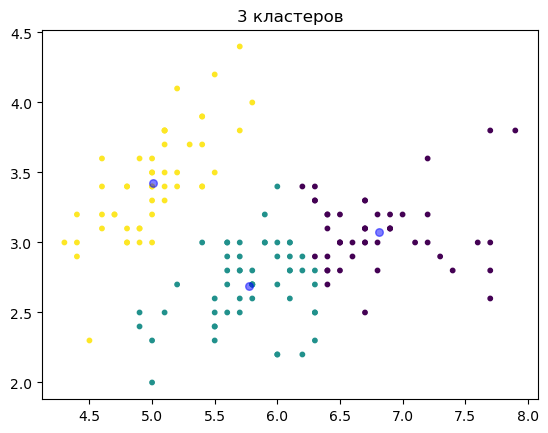

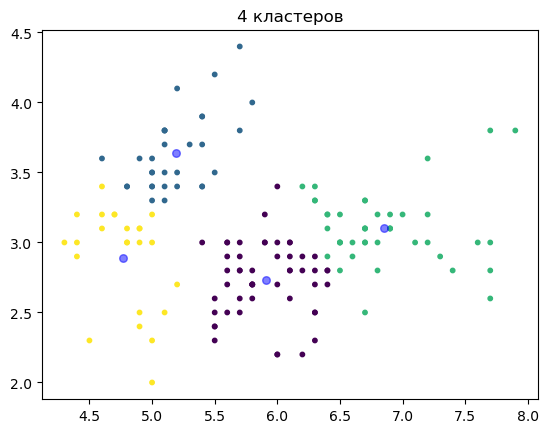

In [4]:
import seaborn as sns
x = sns.load_dataset('iris')
for i in range(2,5):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x.iloc[1:,:2])
  y_kmeans = kmeans.predict(x.iloc[1:,:2])
  X, y_true = make_blobs(n_samples = 10, centers = i, cluster_std = 1, random_state = 0)
  plt.scatter(x.iloc[1:,0], x.iloc[1:,1], c = y_kmeans, s =10)
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:,0], centers[:,1], c = 'blue', s =30, alpha = 0.5)
  plt.title(f"{i} кластеров")
  plt.show()

Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

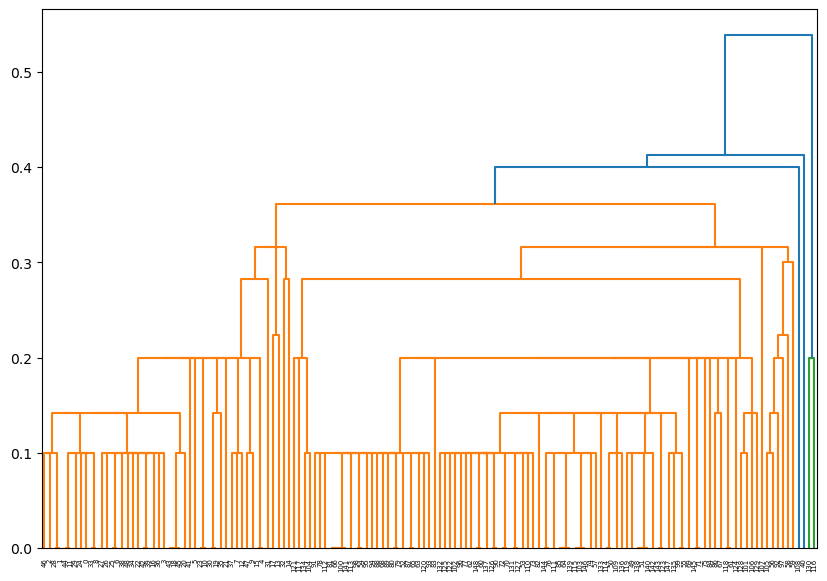

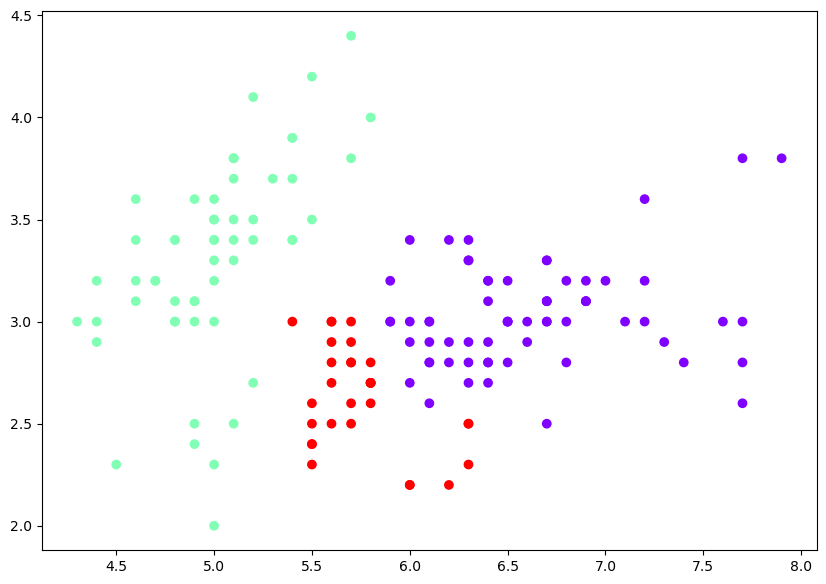

In [3]:
import seaborn as sns
x = sns.load_dataset('iris')
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt
linked = linkage(x.iloc[1:,:2], 'single')
labellist = range(len(x.iloc[1:,1:]))
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labellist,distance_sort ='descending',show_leaf_counts = True)
plt.show()
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict (x.iloc[1:,:2])
plt.figure(figsize= (10, 7))
plt.scatter(x.iloc[1:,0], x.iloc[1:,1], c=cluster. labels_, cmap='rainbow')